# Scraped Positions API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedPositionsAPI/Scraped%20Positions%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Positions API

The goal of Scraped Positions API is to collect and return scraped positions by the given filters or position IDs. This can be done by using the `ScrapedPositionsAPI` class and calling appropriate methods

#### 1. Request by filters

Positions can be retrieved for specific filters, by calling the `get_positions` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the position received

`received_date_to` Latest date the position received

`updated_date_from` Earliest date the position updated

`updated_date_to` Latest date the position updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by position IDs

Positions can be retrieved for specific position IDs, by calling the `get_positions_by_position_ids` method with the following argument:

#### Required

`position_ids` A list of position ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_open_date, scraped_open_port, scraped_commercial_operator, scraped_cargo_type, scraped_last_cargo_types
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
open_name, open_taxonomy, commercial_operator, cargo_type, cargo_type_group, last_cargo_types
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for all the optional arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_positions import ScrapedPositionsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedPositionsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedPositionsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker positions received the last 4 days, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(days=4)

And then call `get_positions` method, as below

In [6]:
scraped_positions = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
)

next(iter(scraped_positions), None)

ScrapedPosition(position_id=182506552, message_id=30799919, parsed_part_id=45793730, line_from=31, line_to=31, source='Email', updated_date=datetime.datetime(2022, 11, 17, 15, 20, 40, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 11, 17, 15, 18, 46, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='minerva roxanne', scraped_deadweight='103', scraped_year_built=None, imo=9276585, vessel_name='Minerva Roxanne', deadweight=103560, year_built=2004, liquid_capacity=113317, vessel_type_id=1, vessel_type='Tanker', vessel_class_id=86, vessel_class='Aframax', scraped_open_date='22-nov', open_date_from=datetime.datetime(2022, 11, 22, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2022, 11, 22, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='paulsboro', open_geo_id=3868, open_name='Philadelphia', open_taxonomy_id=2, open_taxonomy='Port', scraped_commercial_operator='minerva', commercial_operator_id=962, commercial_operator='M

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_positions)

df.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,182506552,30799919,45793730,31,31,Email,2022-11-17 15:20:40+00:00,2022-11-17 15:18:46+00:00,False,minerva roxanne,...,False,False,False,False,False,False,False,28-nov minerva roxanne 103 +16y 42.0 paulsboro...,MJLF,False
1,182506553,30799919,45793730,26,26,Email,2022-11-17 15:20:40+00:00,2022-11-17 15:18:46+00:00,False,green attitude,...,False,True,False,False,False,False,False,26-nov poss green attitude 112 18 44.0 usg 26-...,MJLF,False
2,182506554,30799919,45793730,25,25,Email,2022-11-17 15:20:40+00:00,2022-11-17 15:18:46+00:00,False,minerva elpida,...,False,False,False,False,False,True,False,26-nov uncert minerva elpida 112 10 44.0 st eu...,MJLF,False
3,182506555,30799919,45793730,16,16,Email,2022-11-17 15:20:40+00:00,2022-11-17 15:18:46+00:00,False,sakura princess,...,False,True,False,False,False,False,False,23-nov poss sakura princess 105 07 42.0 off ga...,MJLF,False
4,182506556,30799919,45793730,36,36,Email,2022-11-17 15:20:40+00:00,2022-11-17 15:18:46+00:00,False,ebn hawkel,...,False,False,False,False,False,False,False,03-dec ballast ebn hawkel 112 21 44.0 richmond...,MJLF,False


#### Request by IMOs

To get positions for specific vessel(s) by their IMO number(s), you can simple call the `get_positions` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9321720, 9385192, 9325049, 9406013, 9645437]  # Or add a list of your desired IMOs

scraped_positions_by_imos = api.get_positions(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_positions_by_imos)
df_by_imos.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,182507474,30799997,45793801,45,45,Email,2022-11-17 15:23:12+00:00,2022-11-17 15:19:28+00:00,False,pinnacle spirit,...,False,False,False,False,False,False,False,05-dec pinnacle spirit 159 08 48.0 sines 20-no...,MJLF,False
1,182507476,30799997,45793801,32,32,Email,2022-11-17 15:23:12+00:00,2022-11-17 15:19:28+00:00,False,sonangol namibe,...,False,True,False,False,False,False,False,10-dec proj sonangol namibe 158 07 48.0 housto...,MJLF,False
2,182507486,30799997,45793801,56,56,Email,2022-11-17 15:23:12+00:00,2022-11-17 15:19:28+00:00,False,front loki,...,False,False,False,False,False,False,False,07-dec front loki 156 10 48.0 fawley 21-nov fr...,MJLF,False
3,182507519,30799997,45793801,24,24,Email,2022-11-17 15:23:12+00:00,2022-11-17 15:19:28+00:00,False,cap victor,...,False,False,False,False,False,False,False,04-dec cap victor 158 07 48.0 philadelphia 28-...,MJLF,False
4,182576939,30838793,45827324,39,39,Email,2022-11-18 10:49:12+00:00,2022-11-18 00:00:00+00:00,False,front loki,...,False,False,False,True,False,False,False,5-dec front loki 10 156 fawley 21-nov frontlin...,SSY,False


#### Request by position IDs

In the same manner, to get data for specific position ID(s), you must call the `get_positions_by_position_ids` method for a list of desired position ID(s)

Date arguments are not available in this method

In [9]:
position_ids = [182459667, 182459702, 182624943, 182624998, 182508037]  # Or add a list of your desired position IDs

scraped_positions_by_ids = api.get_positions_by_position_ids(
    position_ids = position_ids,
)

df_by_ids = pd.DataFrame(scraped_positions_by_ids)
df_by_ids.head()

,position_id,message_id,parsed_part_id,line_from,line_to,source,updated_date,received_date,is_deleted,scraped_vessel_name,...,has_dry_dock,has_if,has_on_hold,has_on_subs,has_prompt,has_uncertain,is_position_list,content,sender,is_private
0,182459667,30791168,45785098,21,21,Email,2022-11-17 11:57:58+00:00,2022-11-17 11:54:41+00:00,False,SEASHARK,...,False,False,False,False,False,False,False,"20/11 SEASHARK 32 178 37,947 11.00 GER 04 ...",SSY,False
1,182459702,30791168,45785098,59,59,Email,2022-11-17 11:57:58+00:00,2022-11-17 11:54:41+00:00,False,MOUNT OLYMPUS,...,False,False,False,False,False,False,False,"27/11 MOUNT OLYMPUS 40 182 42,241 11.97 MAR...",SSY,False
2,182508037,30800115,45793950,27,27,Email,2022-11-17 15:27:04+00:00,2022-11-17 15:23:16+00:00,False,ardmore exporter,...,False,False,False,False,False,False,False,ardmore exporter 49 52 14 yabucoa 19/11 ardmor...,MJLF,False
3,182624943,30849799,45839901,88,88,Email,2022-11-18 16:58:54+00:00,2022-11-18 16:55:19+00:00,False,advantage spice,...,False,False,False,False,False,False,False,14-dec advantage spice 156 10 48.1 rotterdam 2...,MJLF,False
4,182624998,30849799,45839901,12,12,Email,2022-11-18 16:58:54+00:00,2022-11-18 16:55:19+00:00,False,eagle san pedro,...,False,True,False,False,False,False,False,26-nov proj eagle san pedro 157 12 49.0 off ga...,MJLF,False


#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [10]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_deadweight',
    'deadweight',
    'scraped_commercial_operator',
    'commercial_operator',
    'scraped_open_port',
    'open_name',
]

scraped_mapped_df = pd.DataFrame(scraped_positions, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_deadweight,deadweight,scraped_commercial_operator,commercial_operator,scraped_open_port,open_name
0,minerva roxanne,Minerva Roxanne,103,103560,minerva,Minerva Marine,paulsboro,Philadelphia
1,green attitude,Green Attitude,112,113000,trafigura,Trafigura,usg,US Gulf
2,minerva elpida,Minerva Elpida,112,112793,minerva,Minerva Marine,st eustatius,St Eustatius
3,sakura princess,Sakura Princess,105,105365,exxon,ExxonMobil,galveston,Galveston
4,ebn hawkel,Ebn Hawkel,112,111650,trafigura,Trafigura,richmond ca,Richmond


## Examples

Let's start by fetching all tanker positions received the last week

In [11]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_positions = api.get_positions(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped positions

The `is_deleted` property of a scraped position indicates whether it is valid or not. If it is set to `True`, the corresponding `position_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped positions in the following examples.

In [12]:
example_scraped_positions = [position for position in example_scraped_positions if not position.is_deleted]

next(iter(example_scraped_positions), None)

ScrapedPosition(position_id=181989820, message_id=30610611, parsed_part_id=45633241, line_from=13, line_to=13, source='Email', updated_date=datetime.datetime(2022, 11, 14, 15, 27, 26, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 11, 14, 15, 23, 58, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='chevron tbn', scraped_deadweight='115', scraped_year_built='19', imo=None, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=0, vessel_type=None, vessel_class_id=None, vessel_class=None, scraped_open_date='18-nov', open_date_from=datetime.datetime(2022, 11, 18, 0, 0, tzinfo=datetime.timezone.utc), open_date_to=datetime.datetime(2022, 11, 18, 0, 0, tzinfo=datetime.timezone.utc), scraped_open_port='usg', open_geo_id=24676, open_name='US Gulf', open_taxonomy_id=4, open_taxonomy='Level0', scraped_commercial_operator='chevron', commercial_operator_id=282, commercial_operator='Chevron', scraped_cargo_type=None, cargo

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [13]:
example_columns = [
    'imo',
    'commercial_operator',
    'open_date_to',
    'open_name',
    'is_deleted',
]

data = pd.DataFrame(example_scraped_positions, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,commercial_operator,open_date_to,open_name,is_deleted
0,9826732,Heidmar,2022-11-14 00:00:00+00:00,Sines,False
1,9843211,Thenamaris,2022-11-17 00:00:00+00:00,Canaport,False
2,9413688,Vitol,2022-11-17 00:00:00+00:00,Cristobal,False
3,9440526,Minerva Marine,2022-11-15 00:00:00+00:00,St Eustatius,False
4,9333785,Zodiac Maritime,2022-11-13 00:00:00+00:00,Philadelphia,False


#### Top 10 Commercical Operators

In this example, we will find the top 10 Commercial Operators, based on the number of their vessels opening

In [14]:
top_co_ser = data[['commercial_operator', 'imo']].drop_duplicates().commercial_operator.value_counts().head(10)

top_co_df = top_co_ser.to_frame(name='VesselCount').reset_index().rename(columns={'index': 'CommercialOperator'})

top_co_df

,CommercialOperator,VesselCount
0,Trafigura,56
1,Dynacom Tankers,39
2,Hafnia,37
3,Frontline,34
4,Navig8 group,32
5,Scorpio Commercial Management,28
6,Vitol,27
7,Shell,27
8,Tankers International,26
9,Penfield Marine,26


And display results in a bar plot

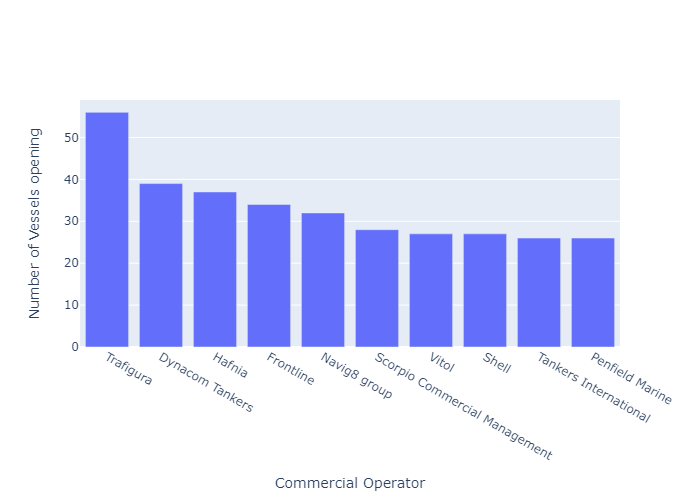

In [15]:
top_co_fig = go.Figure()

bar = go.Bar(
    x=top_co_df.CommercialOperator.tolist(),
    y=top_co_df.VesselCount.tolist(),
)

top_co_fig.add_trace(bar)
top_co_fig.update_xaxes(title_text="Commercial Operator")
top_co_fig.update_yaxes(title_text="Number of Vessels opening")
top_co_fig.show()

#### Vessels opening at specific ports

In this example, we will create a visualization, for the number of distinct vessels opening at specific ports per day over the next week

In [16]:
this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')
ports = data[data.open_name.notna()].open_name.value_counts().head().index.tolist()

ports

['Singapore', 'Rotterdam', 'US Gulf', 'UK Continent', 'Mumbai']

Create the pivot table

In [17]:
ports_mask = data.open_name.isin(ports) & data.open_date_to.isin(this_week_days)

df_ports = data[ports_mask]

df_pivot = pd.pivot_table(
    df_ports,
    columns='open_name',
    index='open_date_to',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'open_date_to'})

df_pivot

open_name,open_date_to,Mumbai,Rotterdam,Singapore,UK Continent,US Gulf
0,2022-11-21 00:00:00+00:00,0,3,9,1,1
1,2022-11-22 00:00:00+00:00,2,8,6,0,3
2,2022-11-23 00:00:00+00:00,2,3,6,1,0
3,2022-11-24 00:00:00+00:00,3,3,8,1,0
4,2022-11-25 00:00:00+00:00,2,3,9,2,5
5,2022-11-26 00:00:00+00:00,0,1,5,2,3
6,2022-11-27 00:00:00+00:00,0,2,3,3,0


And display the results as timeseries

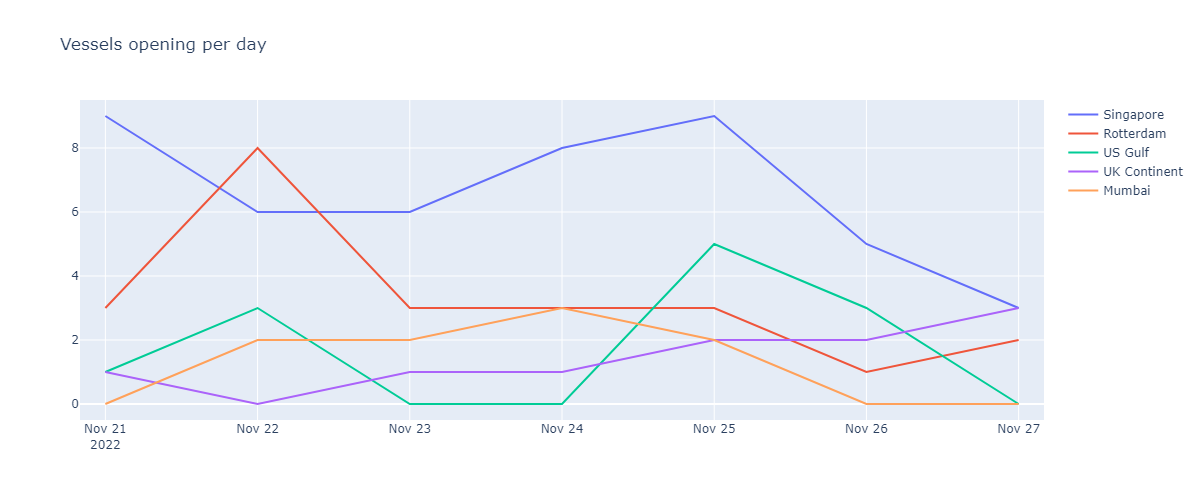

In [18]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Vessels opening at {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(label=port,
          method='update',
          args=args,
        )

title = 'Vessels opening per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x = df_pivot.open_date_to,
        y = df_pivot[port],
        name = port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [19]:
output_path = '' # Change output_path with your path
filename = 'last_week_positions.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)